In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmaps
import scipy.stats as st
from scipy.stats import linregress
from config import *

gmaps.configure(api_key=api_key)

In [2]:
#Load Data
temp_file = 'Resources/temp_data.csv'
rainfall_file = 'Resources/rainfall_data.csv'
lat_long_file = 'Resources/Country_Lat_Long.csv'
temp_data = pd.read_csv(temp_file, error_bad_lines=False)
rainfall_data = pd.read_csv(rainfall_file, error_bad_lines=False)
lat_long_data = pd.read_csv(lat_long_file, encoding="ISO-8859-1", error_bad_lines=False)
happy_2015 = pd.read_csv('Resources/2015.csv')
happy_2016 = pd.read_csv('Resources/2016.csv')
happy_2017 = pd.read_csv('Resources/2017.csv')
happy_2018 = pd.read_csv('Resources/2018.csv')
happy_2019 = pd.read_csv('Resources/2019.csv')

In [3]:
#Clean & Merge weather data
#drop na values
temp_data = temp_data.dropna()
rainfall_data = rainfall_data.dropna()

#merge rainfall into temp dataframe
combined_weather_df = pd.merge(temp_data, rainfall_data, how="outer")

#add Degrees F Column
combined_weather_df["Temperature - F"] = combined_weather_df["Temperature - (Celsius)"]*9/5 + 32

#group by country & year
combined_data_groupby = combined_weather_df.groupby(["Country", "Year"],as_index=False)

#temp_data_groupby.head(10)
weather_df = combined_data_groupby.mean()
weather_df

,Country,Year,Temperature - (Celsius),Rainfall - (MM),Temperature - F
0,Afghanistan,1991,12.894488,36.287492,55.210078
1,Afghanistan,1992,12.544548,34.013019,54.580186
2,Afghanistan,1993,12.977138,26.423775,55.358849
3,Afghanistan,1994,13.080018,28.518532,55.544033
4,Afghanistan,1995,13.040895,25.074846,55.473611
...,...,...,...,...,...
5065,Zimbabwe,2012,21.910075,45.312368,71.438135
5066,Zimbabwe,2013,21.624350,51.234424,70.923830
5067,Zimbabwe,2014,21.710483,50.608135,71.078870
5068,Zimbabwe,2015,22.327625,32.552881,72.189725


In [4]:
#Clean & merge happiness data
#Add year column
happy_2015["Year"] = 2015
happy_2016["Year"] = 2016
happy_2017["Year"] = 2017
happy_2018["Year"] = 2018
happy_2019["Year"] = 2019

#Rename columns (Country, Happiness Rank, Happiness Score, Year)
happy_2015 = happy_2015.rename(columns={
    "Economy (GDP per Capita)": "Economy",
    "Health (Life Expectancy)": "Health"
})
happy_2016 = happy_2016.rename(columns={
    "Economy (GDP per Capita)": "Economy",
    "Health (Life Expectancy)": "Health"
})
happy_2017 = happy_2017.rename(columns={
    "Happiness.Rank":"Happiness Rank",
    "Happiness.Score":"Happiness Score",
    "Economy..GDP.per.Capita.":"Economy",
    "Health..Life.Expectancy.":"Health"
})
happy_2018 = happy_2018.rename(columns={
    "Overall rank":"Happiness Rank",
    "Score":"Happiness Score",
    "Country or region":"Country",
    "GDP per capita":"Economy",
    "Healthy life expectancy":"Health"
})

happy_2019 = happy_2019.rename(columns={
    "Overall rank":"Happiness Rank",
    "Score":"Happiness Score",
    "Country or region":"Country",
    "GDP per capita":"Economy",
    "Healthy life expectancy":"Health"
})

happy_2015_clean = happy_2015[["Year","Country","Happiness Rank","Happiness Score","Economy","Health"]]
happy_2016_clean = happy_2016[["Year","Country","Happiness Rank","Happiness Score","Economy","Health"]]
happy_2017_clean = happy_2017[["Year","Country","Happiness Rank","Happiness Score","Economy","Health"]]
happy_2018_clean = happy_2018[["Year","Country","Happiness Rank","Happiness Score","Economy","Health"]]
happy_2019_clean = happy_2019[["Year","Country","Happiness Rank","Happiness Score","Economy","Health"]]

#Merge datasets
combined_happy_df = pd.concat([happy_2015_clean, happy_2016_clean, happy_2017_clean, happy_2018_clean, happy_2019_clean], ignore_index=True)

happy_groupby = combined_happy_df.groupby(["Country", "Year"])
combined_happy_df


,Year,Country,Happiness Rank,Happiness Score,Economy,Health
0,2015,Switzerland,1,7.587,1.39651,0.94143
1,2015,Iceland,2,7.561,1.30232,0.94784
2,2015,Denmark,3,7.527,1.32548,0.87464
3,2015,Norway,4,7.522,1.45900,0.88521
4,2015,Canada,5,7.427,1.32629,0.90563
...,...,...,...,...,...,...
777,2019,Rwanda,152,3.334,0.35900,0.61400
778,2019,Tanzania,153,3.231,0.47600,0.49900
779,2019,Afghanistan,154,3.203,0.35000,0.36100
780,2019,Central African Republic,155,3.083,0.02600,0.10500


In [5]:
weather_df["Country"] = weather_df["Country"].str.strip()
merge = pd.merge(weather_df, combined_happy_df, on=["Country","Year"], how="right")
merge = merge.dropna()
merge.head(50)

,Country,Year,Temperature - (Celsius),Rainfall - (MM),Temperature - F,Happiness Rank,Happiness Score,Economy,Health
0,Switzerland,2015,7.734357,103.620892,45.921844,1,7.587,1.39651,0.94143
1,Iceland,2015,1.922286,96.057408,35.460115,2,7.561,1.30232,0.94784
2,Denmark,2015,9.208227,72.872508,48.574808,3,7.527,1.32548,0.87464
3,Norway,2015,2.516758,102.191333,36.530165,4,7.522,1.45900,0.88521
4,Canada,2015,-5.953936,36.494175,21.282915,5,7.427,1.32629,0.90563
5,Finland,2015,3.524423,50.030042,38.343962,6,7.406,1.29025,0.88911
6,Netherlands,2015,10.815034,67.663075,51.467061,7,7.378,1.32944,0.89284
7,Sweden,2015,3.329637,61.139508,37.993346,8,7.364,1.33171,0.91087
8,New Zealand,2015,10.015377,151.030217,50.027678,9,7.286,1.25018,0.90837
9,Australia,2015,22.296192,36.870951,72.133145,10,7.284,1.33358,0.93156


In [6]:
#Correlation
def correlation(x_axis,y_axis):
    correlation = st.pearsonr(x_axis,y_axis)
    print(f"The correlation between both factors is {round(correlation[0],2)}")

In [7]:
#Regression
def regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(line_eq)
    #plt.annotate(line_eq,(0,50),fontsize=15,color="red")
    print(f"The r-squared is: {rvalue**2}")

The correlation between both factors is 0.37
y = 1.16x + 2.4
The r-squared is: 0.1379683352333317


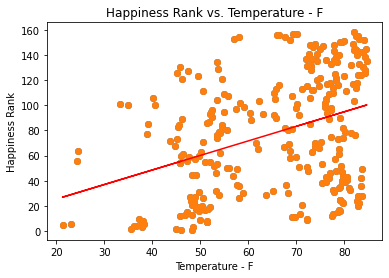

In [10]:
plt.scatter(merge["Temperature - F"],merge["Happiness Rank"])
plt.title("Happiness Rank vs. Temperature - F")
plt.xlabel("Temperature - F")
plt.ylabel("Happiness Rank")
correlation(merge["Temperature - F"],merge["Happiness Rank"])
regression(merge["Temperature - F"],merge["Happiness Rank"])
plt.savefig("Images/HR_vs_Temp.png")
plt.show()

The correlation between both factors is -0.06
y = -0.05x + 81.97
The r-squared is: 0.003476869390568872


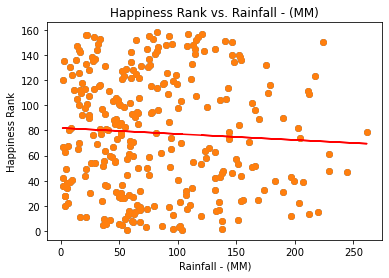

In [12]:
plt.scatter(merge["Rainfall - (MM)"],merge["Happiness Rank"])
plt.title("Happiness Rank vs. Rainfall - (MM)")
plt.xlabel("Rainfall - (MM)")
plt.ylabel("Happiness Rank")
correlation(merge["Rainfall - (MM)"],merge["Happiness Rank"])
regression(merge["Rainfall - (MM)"],merge["Happiness Rank"])
plt.savefig("Images/HR_vs_Rainfall.png")

The correlation between both factors is 0.05
y = 0.0x + 5.32
The r-squared is: 0.0028822608960913224


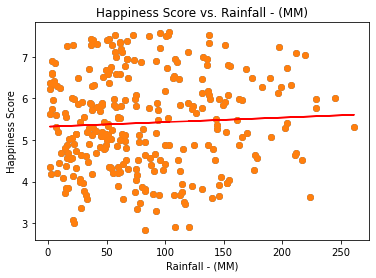

In [14]:
plt.scatter(merge["Rainfall - (MM)"],merge["Happiness Score"])
plt.title("Happiness Score vs. Rainfall - (MM)")
plt.xlabel("Rainfall - (MM)")
plt.ylabel("Happiness Score")
correlation(merge["Rainfall - (MM)"],merge["Happiness Score"])
regression(merge["Rainfall - (MM)"],merge["Happiness Score"])
plt.savefig("Images/HS_vs_Rainfall.png")

The correlation between both factors is -0.13
y = -0.0x + 0.98
The r-squared is: 0.016604249349491715


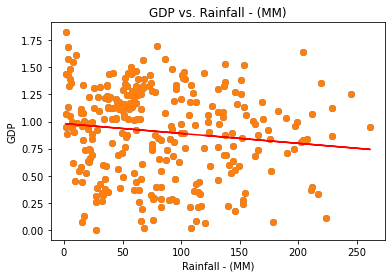

In [19]:
plt.scatter(merge["Rainfall - (MM)"],merge["Economy"])
plt.title("GDP vs. Rainfall - (MM)")
plt.xlabel("Rainfall - (MM)")
plt.ylabel("GDP")
correlation(merge["Rainfall - (MM)"],merge["Economy"])
regression(merge["Rainfall - (MM)"],merge["Economy"])
plt.savefig("Images/GDP_vs_Rainfall.png")

The correlation between both factors is -0.02
y = -0.0x + 0.6
The r-squared is: 0.00038395850126281267


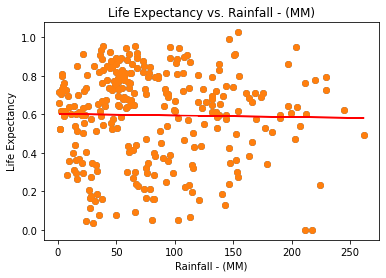

In [18]:
plt.scatter(merge["Rainfall - (MM)"],merge["Health"])
plt.title("Life Expectancy vs. Rainfall - (MM)")
plt.xlabel("Rainfall - (MM)")
plt.ylabel("Life Expectancy")
correlation(merge["Rainfall - (MM)"],merge["Health"])
regression(merge["Rainfall - (MM)"],merge["Health"])
plt.savefig("Images/LE_vs_Rainfall.png")

In [20]:
merge.groupby(["Country"]).mean()


,Year,Temperature - (Celsius),Rainfall - (MM),Temperature - F,Happiness Rank,Happiness Score,Economy,Health
Country,,,,,,,,
Afghanistan,2015.5,14.190243,30.848974,57.542438,153.5,3.4675,0.351045,0.238395
Albania,2015.5,12.703798,84.724628,54.866837,102.0,4.8070,0.916985,0.771660
Algeria,2015.5,23.861971,5.980753,74.951548,53.0,5.9800,0.995975,0.617850
Angola,2015.5,22.408171,77.750729,72.334708,139.0,3.9495,0.802545,0.108370
Argentina,2015.5,14.734192,51.571862,58.521547,28.0,6.6120,1.102440,0.742170
...,...,...,...,...,...,...,...,...
Venezuela,2015.5,26.458188,144.571217,79.624738,33.5,6.4470,1.088955,0.669780
Vietnam,2015.5,25.105083,154.850942,77.189150,85.5,5.2105,0.686265,0.704165
Yemen,2015.5,24.379412,13.649371,75.882942,141.5,3.9005,0.562940,0.355560


In [21]:
#Merge Lat and Long into the combined happiness and weather df
merge = pd.merge(merge,lat_long_data, on="Country",how="inner")
merge

,Country,Year,Temperature - (Celsius),Rainfall - (MM),Temperature - F,Happiness Rank,Happiness Score,Economy,Health,Latitude,Longitude
0,Switzerland,2015,7.734357,103.620892,45.921844,1,7.587,1.39651,0.94143,46.818188,8.227512
1,Switzerland,2016,7.135720,137.437713,44.844296,2,7.509,1.52733,0.86303,46.818188,8.227512
2,Iceland,2015,1.922286,96.057408,35.460115,2,7.561,1.30232,0.94784,64.963051,-19.020835
3,Iceland,2016,3.206224,101.170875,37.771204,3,7.501,1.42666,0.86733,64.963051,-19.020835
4,Denmark,2015,9.208227,72.872508,48.574808,3,7.527,1.32548,0.87464,56.263920,9.501785
...,...,...,...,...,...,...,...,...,...,...,...
281,Togo,2016,27.986833,92.503328,82.376300,155,3.303,0.28123,0.24811,8.619543,0.824782
282,Puerto Rico,2016,25.969833,219.701050,78.745700,15,7.039,1.35943,0.77758,18.220833,-66.590149
283,Belize,2016,26.251350,166.104567,79.252430,52,5.956,0.87616,0.45569,17.189877,-88.497650
284,Somalia,2016,27.862917,27.401551,82.153250,76,5.440,0.00000,0.11466,5.152149,46.199616


In [22]:
#Heat map of happiness rank 
locations = merge[["Latitude","Longitude"]]
weights = merge["Happiness Rank"]
max_intensity = 158
fig = gmaps.figure(center = (22.0,0.0), zoom_level = 1.8)
heat_layer = gmaps.heatmap_layer(locations, weights=weights, dissipating=False, max_intensity=max_intensity, point_radius=7)
fig.add_layer(heat_layer)
fig

Figure(layout=FigureLayout(height='420px'))